In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

### Маятник – тело с массой 0.4 кг, моментом инерции относительно оси 0.06 кг∙м2, центр его тяжести находится на расстоянии a м от оси, трения нет;

Это значит, что I = M*L^2 -> L = sqrt(I / M) = 0.38м

In [2]:
I = 0.06
M = 0.4
dT = 0.1
g = 9.81
L = 0.38
TotalTime = 10
Tin = np.linspace(0, TotalTime, TotalTime/dT + 1)
Tin

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [3]:
sys_tf = signal.TransferFunction([1], [I, 0, -L * M * g])
print(sys_tf)

TransferFunctionContinuous(
array([16.66666667]),
array([  1.   ,   0.   , -24.852]),
dt: None
)


### Представьте систему с помощью уравнения состояния. Проинтерпретируйте переменные состояния.

In [4]:
sys_tf = signal.tf2ss([1], [I, 0, -L * M * g])
print(sys_tf)

(array([[-0.   , 24.852],
       [ 1.   ,  0.   ]]), array([[1.],
       [0.]]), array([[ 0.        , 16.66666667]]), array([[0.]]))


#### d(z1) / d(t) = 24.8z2 + M and d(z2) / d(t) = z1 and theta = 16.(6)z2

### Промоделируйте свободное (т.е. без включения двигателя) движение маятника из малого ненулевого угла. Упадёт ли при этом маятник?

In [5]:
def plotting (sys):
    axes = plt.gca()
    axes.set_ylim([-0.4, 8])
    axes.set_xlim([0, 10])
    zero_input = np.zeros(Tin.shape)
    start_pos = 1 / 180.0 * np.pi
    Tout,yout,xout = signal.lsim(sys, zero_input, Tin, X0=[0, start_pos/40])
    axes = plt.plot(Tout, yout, 'b')
    limit = 15 / 180.0 * np.pi
    axes = plt.plot([0, TotalTime], [limit, limit], 'r')
    axes = plt.plot([0, TotalTime], [-limit, -limit], 'r')
    plt.show()

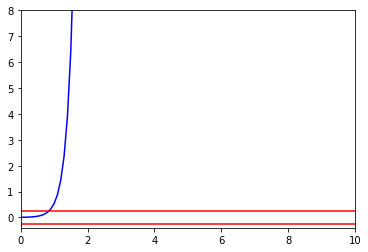

In [6]:
plotting(sys_tf)

### Добавьте в систему PID-регулятор. Проинтерпретируйте изменения в уравнении состояния.

In [7]:
def PID (P, I, D):
    PID_num = [D, P, I]
    PID_den = [1, 0]
    interm_num = np.convolve([1], PID_num)
    interm_den = np.convolve([I, 0, -M*g*L], PID_den)
    total_sys = signal.tf2ss(interm_den, np.polyadd(interm_den, interm_num))
    return total_sys

In [8]:
#plotting(total_sys)   
total_sys = PID(1, 0, 0)  #при таких параметрах выдается предупреждение
print(total_sys)          #the results may be meaningless

(array([[0.]]), array([[1.]]), array([[0.]]), array([[3.03616224]]))


C:\Users\fruit\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


In [9]:
zero_input = np.zeros(Tin.shape)  # ошибка cannot copy sequence with size 2 to array axis with dimension 1
start_pos = 1 / 180.0 * np.pi
Tout,yout,xout = signal.lsim(total_sys, zero_input, Tin, X0=[0., start_pos/40])

ValueError: cannot copy sequence with size 2 to array axis with dimension 1

In [10]:
total_sys = PID(1,1,0)  # ошибка cannot copy sequence with size 2 to array axis with dimension 3
Tout,yout,xout = signal.lsim(total_sys, zero_input, Tin, X0=[0., start_pos/40]) 

ValueError: cannot copy sequence with size 2 to array axis with dimension 3

In [11]:
Tout,yout,xout = signal.lsim(total_sys, zero_input, Tin, X0=[0., start_pos/40, 0]) 
yout  # при добавлении третьего параметра в Х0 выдаются какие-то разумные результаты

array([-4.36332313e-04, -4.80998589e-04, -5.27565623e-04, -5.75757720e-04,
       -6.25259771e-04, -6.75714236e-04, -7.26718255e-04, -7.77820919e-04,
       -8.28520728e-04, -8.78263281e-04, -9.26439234e-04, -9.72382564e-04,
       -1.01536920e-03, -1.05461607e-03, -1.08928057e-03, -1.11846064e-03,
       -1.14119532e-03, -1.15646603e-03, -1.16319848e-03, -1.16026545e-03,
       -1.14649032e-03, -1.12065157e-03, -1.08148820e-03, -1.02770628e-03,
       -9.57986531e-04, -8.70993159e-04, -7.65383880e-04, -6.39821290e-04,
       -4.92985584e-04, -3.23588689e-04, -1.30389870e-04,  8.77871843e-05,
        3.32035734e-04,  6.03345827e-04,  9.02582586e-04,  1.23046295e-03,
        1.58753092e-03,  1.97413125e-03,  2.39038185e-03,  2.83614469e-03,
        3.31099557e-03,  3.81419270e-03,  4.34464435e-03,  4.90087564e-03,
        5.48099483e-03,  6.08265908e-03,  6.70304031e-03,  7.33879113e-03,
        7.98601133e-03,  8.64021529e-03,  9.29630075e-03,  9.94851926e-03,
        1.05904490e-02,  